In [2]:
import pandas as pd
import pathlib

In [3]:
rubygems = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/rubygems/*.csv")])

In [4]:
versions = pd.concat([pd.read_csv(f, index_col="id", dtype={"metadata": str, "licenses": str, "requirements": str, "cert_chain": str}) for f in pathlib.Path('.').glob("tables/versions/*.csv")])

In [5]:
attestations = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/attestations/*.csv")])

In [6]:
gem_downloads = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/gem_downloads/*.csv")])

In [7]:
dependencies = pd.concat([pd.read_csv(f, index_col="id", dtype={"unresolved_name": str}) for f in pathlib.Path('.').glob("tables/dependencies/*.csv")])

<Axes: xlabel='day_pushed'>

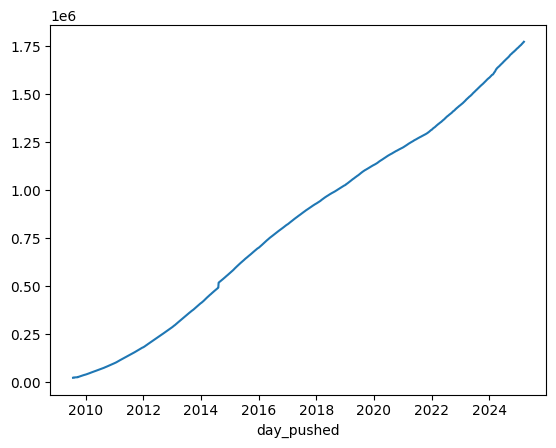

In [8]:
vs = versions.sort_values("created_at", ascending=True)
vs['day_pushed'] = pd.to_datetime(vs['created_at'], format='ISO8601').dt.date
vs.groupby("day_pushed")['full_name'].count().cumsum().plot()

<Axes: xlabel='day_pushed'>

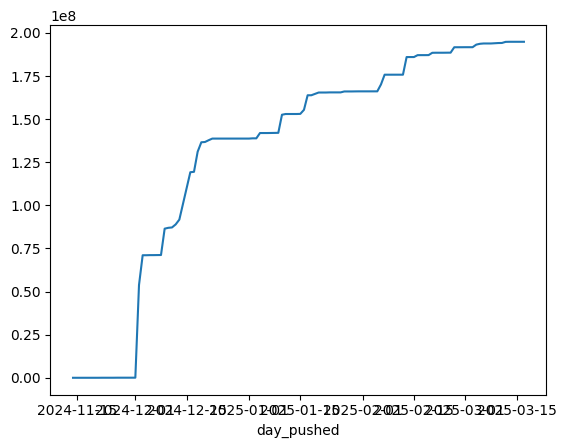

In [9]:
attestations.join(vs, how="inner", on='version_id', rsuffix="_version").join(gem_downloads.set_index('version_id'), how="inner", on='version_id', rsuffix="_gem_downloads").sort_values("day_pushed", ascending=True).groupby("day_pushed")['count'].sum().cumsum().plot()

<Axes: title={'center': 'Unique Rubygems and Versions Attested'}, xlabel='day_pushed'>

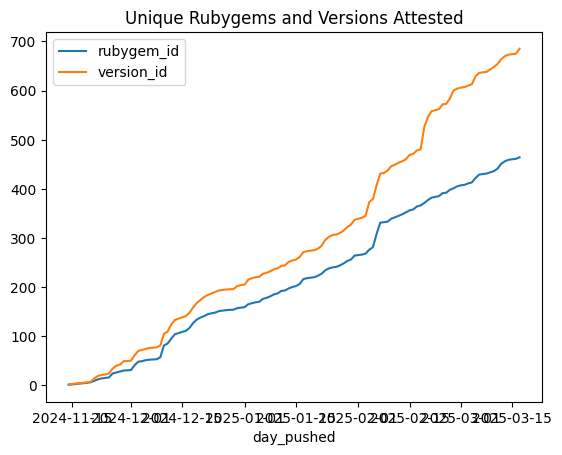

In [10]:
attestations.join(vs, how="inner", on='version_id', rsuffix="_version").sort_values("day_pushed", ascending=True).groupby("day_pushed")[['rubygem_id','version_id']].nunique().cumsum().plot(title="Unique Rubygems and Versions Attested")

In [11]:
attestations.join(vs, how="inner", on='version_id', rsuffix="_version").join(gem_downloads.set_index('version_id'), how="inner", on='version_id', rsuffix="_gem_downloads").sort_values(by=["count"], ascending=False)[['full_name', 'created_at', 'count']].head(25)

,full_name,created_at,count
id,,,
56,net-http-0.6.0,2024-12-02 08:42:35.836453,15961911
54,date-3.4.1,2024-12-02 07:51:28.89031,15222577
51,webrick-1.9.1,2024-12-02 05:48:56.957451,14493443
80,faraday-2.12.2,2024-12-09 10:52:08.369295,14262322
137,securerandom-0.4.1,2024-12-16 05:43:29.94218,13447977
135,timeout-0.4.3,2024-12-16 03:53:44.804142,12543352
65,io-console-0.8.0,2024-12-03 05:05:44.470755,10663327
237,logger-1.6.5,2025-01-10 06:05:46.433497,10489198
455,logger-1.6.6,2025-02-13 09:28:15.950366,10220152


In [12]:
ds = dependencies.join(rubygems['name'], how="inner", on='rubygem_id', rsuffix="_rubygems")
ds['dep_name'] = ds['name']
ds.join(vs[['full_name', 'day_pushed']], how="inner", on='version_id', rsuffix="_versions")


,requirements,created_at,updated_at,rubygem_id,version_id,scope,unresolved_name,name,dep_name,full_name,day_pushed
id,,,,,,,,,,,
10000000,~> 0.1,2024-03-17 16:02:21.86403,2024-03-17 16:02:21.86403,219800.0,1704928.0,runtime,NaN,isogametism_strangles,isogametism_strangles,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000001,~> 0.1,2024-03-17 16:02:21.874907,2024-03-17 16:02:21.874907,219801.0,1704928.0,runtime,NaN,manageless_unhardihood,manageless_unhardihood,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000002,~> 0.1,2024-03-17 16:02:21.885453,2024-03-17 16:02:21.885453,219717.0,1704928.0,runtime,NaN,scleronychia_conyrine,scleronychia_conyrine,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000003,~> 0.1,2024-03-17 16:02:21.895961,2024-03-17 16:02:21.895961,219718.0,1704928.0,runtime,NaN,marasca_snobbishly,marasca_snobbishly,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000004,~> 0.1,2024-03-17 16:02:21.909163,2024-03-17 16:02:21.909163,219719.0,1704928.0,runtime,NaN,whipping_juramental,whipping_juramental,conjunctivitis_enhydritic-0.1.7,2024-03-17
...,...,...,...,...,...,...,...,...,...,...,...
12249995,~> 0.1,2024-04-05 18:30:13.557535,2024-04-05 18:30:13.557535,216715.0,1718973.0,runtime,NaN,jagger_typometry_test,jagger_typometry_test,tolypeutine_ampulliform-0.1.7,2024-04-05
12249996,~> 0.1,2024-04-05 18:30:13.56101,2024-04-05 18:30:13.56101,216716.0,1718973.0,runtime,NaN,jagger_unethic_test,jagger_unethic_test,tolypeutine_ampulliform-0.1.7,2024-04-05
12249997,~> 0.1,2024-04-05 18:30:13.564594,2024-04-05 18:30:13.564594,220699.0,1718973.0,runtime,NaN,polygamous_entrepas,polygamous_entrepas,tolypeutine_ampulliform-0.1.7,2024-04-05


In [15]:
latest_downloads_date = list(pathlib.Path('/Users/segiddins/Development/github.com/segiddins/gem-daily-downloads').glob("dates/*/*/*.csv"))
latest_downloads_date.sort()
latest_downloads_date = pd.to_datetime(latest_downloads_date[-2].stem)
thirty_days_ago = latest_downloads_date - pd.Timedelta(days=30)

latest_downloads = pd.read_csv("/Users/segiddins/Development/github.com/segiddins/gem-daily-downloads/dates/{}/{:02}/{}.csv".format(latest_downloads_date.year, latest_downloads_date.month, latest_downloads_date.strftime("%Y-%m-%d")), index_col="name")
latest_downloads['date'] = latest_downloads_date
thirty_days_ago_downloads = pd.read_csv("/Users/segiddins/Development/github.com/segiddins/gem-daily-downloads/dates/{}/{:02}/{}.csv".format(thirty_days_ago.year, thirty_days_ago.month, thirty_days_ago.strftime("%Y-%m-%d")), index_col="name")
thirty_days_ago_downloads['date'] = thirty_days_ago

# latest_downloads.join(thirty_days_ago_downloads, how="inner", on="date", rsuffix="_30_days_ago")
thirty_days_downloads = latest_downloads['total_downloads'].combine(thirty_days_ago_downloads['total_downloads'], func=lambda x, y: x - y, fill_value=0)

Downloads in the last 30 days

In [16]:
print("{:,} downloads in the last 30 days (from {} to {})".format(thirty_days_downloads.sum(), thirty_days_ago, latest_downloads_date))

3,984,994,946 downloads in the last 30 days (from 2025-02-17 00:00:00 to 2025-03-19 00:00:00)


Gems with 1MM+ downloads in the last 30 days

In [17]:
print("{:,} gems with 1MM+ downloads in the last 30 days".format(thirty_days_downloads[lambda x: x > 1_000_000].count()))

thirty_days_downloads[lambda x: x > 1_000_000].sort_values(ascending=False).to_frame().to_csv("1MM_downloads.csv")


900 gems with 1MM+ downloads in the last 30 days


Distribution of downloads in the last 30 days

<Axes: xlabel='name'>

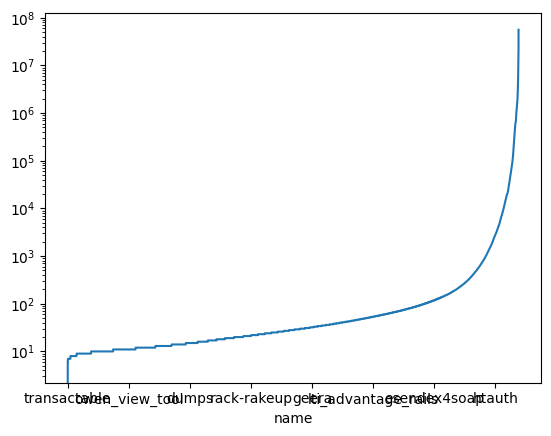

In [18]:
thirty_days_downloads.sort_values(ascending=True).plot(logy=True)


<Axes: title={'center': 'Distribution of downloads in the last 30 days'}, ylabel='name'>

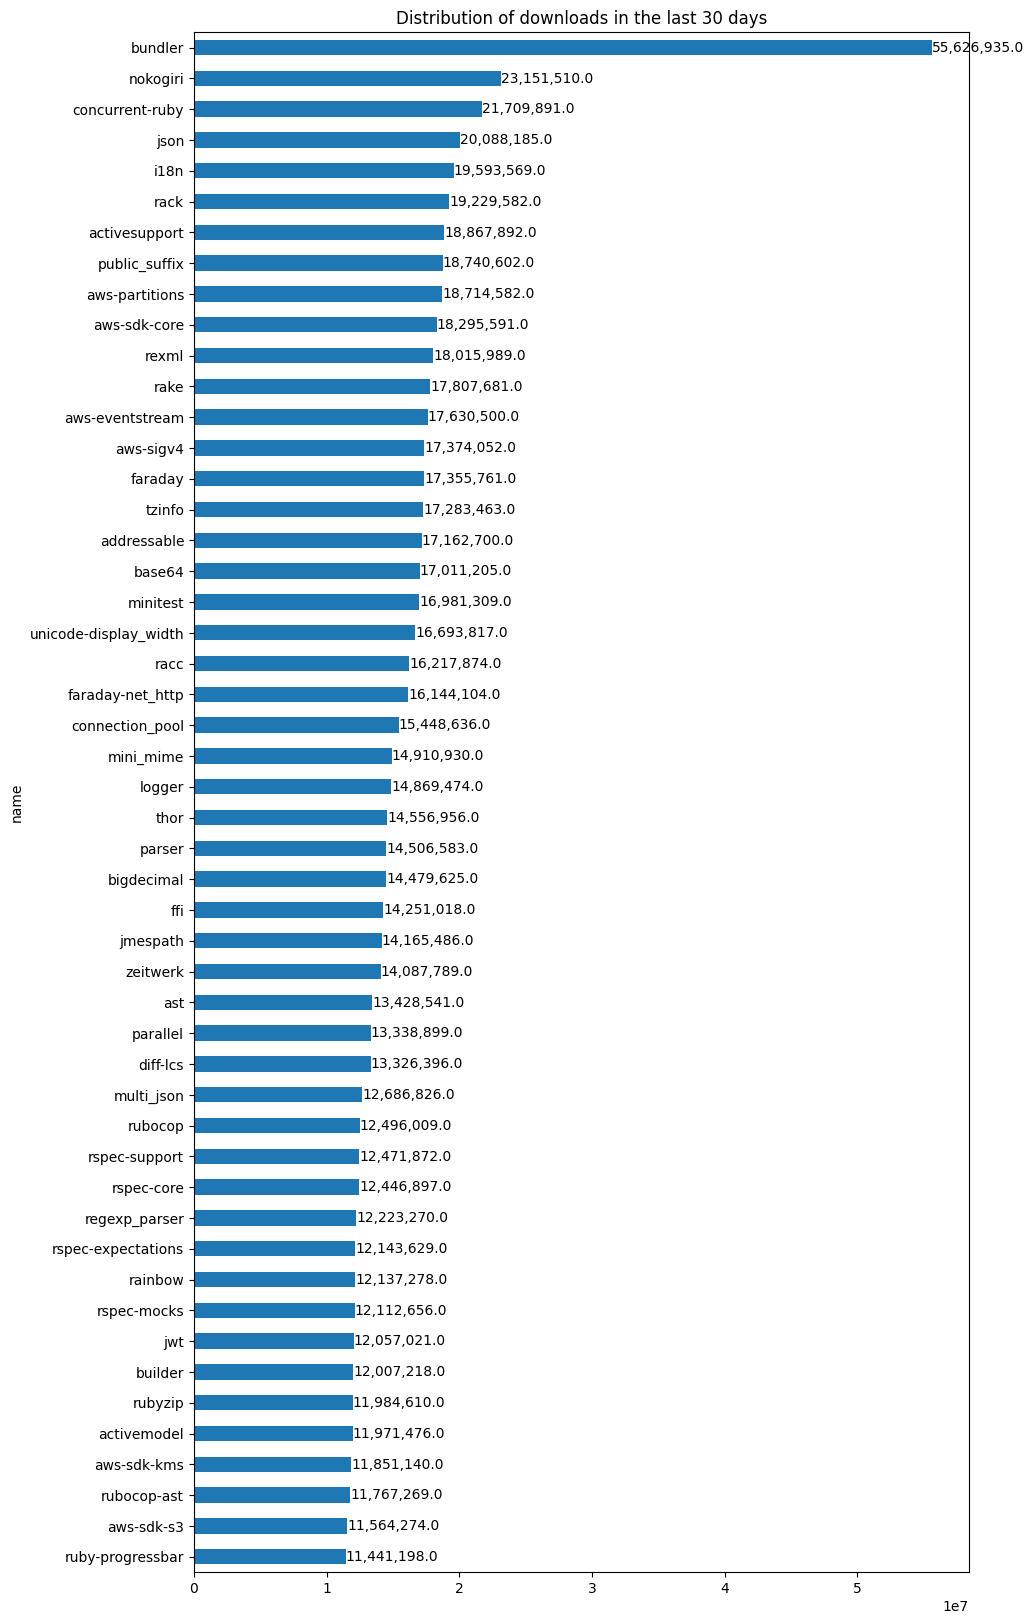

In [19]:
plt = thirty_days_downloads.sort_values(ascending=False).head(50).sort_values(ascending=True).plot(kind="barh", label="Downloads in the last 30 days", title="Distribution of downloads in the last 30 days", figsize=(10, 20))
plt.bar_label(plt.containers[0], fmt='{:,}')
plt

In [20]:
aws_downloads = thirty_days_downloads[thirty_days_downloads.index.str.startswith('aws-', na=False)].sum()
total_downloads = thirty_days_downloads.sum()
print("{:,} downloads from AWS gems in the last 30 days\n{:,} downloads from all gems in the last 30 days\nAWS gems account for {:,.2f}% of all downloads".format(aws_downloads, total_downloads, aws_downloads / total_downloads * 100))

367,325,523 downloads from AWS gems in the last 30 days
3,984,994,946 downloads from all gems in the last 30 days
AWS gems account for 9.22% of all downloads


In [21]:
f = thirty_days_downloads[lambda x: x > 1_000_000].sort_values(ascending=False).to_frame()

latest_release = vs.join(rubygems, how="left", on='rubygem_id', rsuffix="_rubygems").groupby('name')['created_at'].max().sort_values(ascending=False)
f['latest_release'] = [latest_release.loc[name] for name in f.index]
gems_with_attestation = attestations.join(vs, how="left", on='version_id', rsuffix="_versions").join(rubygems, how="left", on='rubygem_id', rsuffix="_rubygems")['name'].unique()
f['has_attestation'] = [name in gems_with_attestation for name in f.index]
f.to_csv("sigstore_adoption.csv")
f

,total_downloads,latest_release,has_attestation
name,,,
bundler,55626935,2025-03-13 20:00:49.470926,False
nokogiri,23151510,2025-03-14 15:42:31.136928,False
concurrent-ruby,21709891,2025-01-15 21:35:44.564414,False
json,20088185,2025-03-12 13:08:49.552044,False
i18n,19593569,2025-01-19 22:49:28.777815,False
...,...,...,...
simple_form,1008820,2024-05-24 14:44:49.436064,False
mocha,1007598,2025-01-24 15:08:20.166196,False
cucumber-messages,1007251,2025-01-31 13:53:59.71145,False


In [22]:
f.groupby('has_attestation').count()

,total_downloads,latest_release
has_attestation,,
False,874,874
True,26,26


In [23]:
f.loc[f['has_attestation']]

,total_downloads,latest_release,has_attestation
name,,,
faraday,17355761,2024-12-09 10:52:08.36394,True
logger,14869474,2025-02-13 09:28:15.937507,True
timeout,10967911,2024-12-16 03:53:44.782799,True
net-imap,10532936,2025-02-07 21:33:05.911694,True
webrick,9974467,2024-12-02 05:48:56.950356,True
date,9910848,2024-12-02 07:52:07.43514,True
mime-types-data,9472868,2025-03-04 19:39:09.201304,True
securerandom,8639244,2024-12-16 05:43:29.935668,True
uri,8044956,2025-02-26 07:14:30.31015,True


In [24]:
f.loc[f['latest_release'] < '2024-01-01'].sort_values(by='latest_release', ascending=True).head(50)


,total_downloads,latest_release,has_attestation
name,,,
escape,1390667,2009-07-25 18:23:33,False
colored,2109267,2010-02-10 18:16:23.759888,False
expression_parser,1125119,2010-09-20 22:48:35.809003,False
erubis,1161483,2011-04-01 22:54:09.171353,False
pyu-ruby-sasl,1137896,2011-05-25 20:16:18.363784,False
ruby-rc4,1815063,2012-02-07 17:41:25.818599,False
rack-accept,1526049,2012-06-15 15:38:20.495863,False
find_a_port,1177265,2012-07-27 19:09:34.285978,False
unicode_utils,2993367,2012-09-30 20:52:20.278513,False
